In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import time
import math
import itertools
pd.set_option('display.max_columns', None)

In [2]:
df18= pd.read_csv(r'C:\Users\gmart\Desktop\EPFL 2° SEMESTRE\DATA SCIENCE\Data-Science-in-Practice\Project\2018weekconcat.csv')
df19= pd.read_csv(r'C:\Users\gmart\Desktop\EPFL 2° SEMESTRE\DATA SCIENCE\Data-Science-in-Practice\Project\2019weekconcat.csv')
df19_merge = df19.copy()
df19_merge.week = df19_merge.week + df18.week.max()
dfall=pd.concat([df18, df19_merge], ignore_index=True)

In [3]:
print(dfall.shape)
print(dfall.dtypes)
dfall.head()

(20800, 25)
Position              int64
Track Name           object
Artist               object
Streams               int64
URL                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
week                  int64
year                  int64
dtype: object


,Position,Track Name,Artist,Streams,URL,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,week,year
0,1,rockstar,Post Malone,9855305,https://open.spotify.com/track/7wGoVu4Dady5GV0...,0.577,0.522,5,-6.594,0,0.0984,0.130000,0.000090,0.1420,0.1190,159.772,audio_features,7wGoVu4Dady5GV0Sv4UIsx,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,https://api.spotify.com/v1/tracks/7wGoVu4Dady5...,https://api.spotify.com/v1/audio-analysis/7wGo...,218320,4,1,2018
1,2,Finesse - Remix; feat. Cardi B,Bruno Mars,8504248,https://open.spotify.com/track/3Vo4wInECJQuz9B...,0.704,0.859,5,-4.877,0,0.0996,0.018500,0.000000,0.0215,0.9260,105.115,audio_features,3Vo4wInECJQuz9BIBMOu8i,spotify:track:3Vo4wInECJQuz9BIBMOu8i,https://api.spotify.com/v1/tracks/3Vo4wInECJQu...,https://api.spotify.com/v1/audio-analysis/3Vo4...,217289,4,1,2018
2,3,No Limit,G-Eazy,7685058,https://open.spotify.com/track/2DQ1ITjI0YoLFzu...,0.838,0.771,1,-3.791,1,0.2440,0.011700,0.000000,0.0853,0.4050,175.957,audio_features,2DQ1ITjI0YoLFzuADN1ZBW,spotify:track:2DQ1ITjI0YoLFzuADN1ZBW,https://api.spotify.com/v1/tracks/2DQ1ITjI0YoL...,https://api.spotify.com/v1/audio-analysis/2DQ1...,245387,4,1,2018
3,4,Bartier Cardi (feat. 21 Savage),Cardi B,7439471,https://open.spotify.com/track/75FDPwaULRdYDn4...,0.909,0.546,8,-7.513,1,0.1750,0.000704,0.000823,0.3600,0.0986,138.043,audio_features,75FDPwaULRdYDn4StFN2rT,spotify:track:75FDPwaULRdYDn4StFN2rT,https://api.spotify.com/v1/tracks/75FDPwaULRdY...,https://api.spotify.com/v1/audio-analysis/75FD...,224613,4,1,2018
4,5,I Fall Apart,Post Malone,6971450,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,0.556,0.538,8,-5.408,0,0.0382,0.068900,0.000000,0.1960,0.2910,143.950,audio_features,75ZvA4QfFiZvzhj2xkaWAh,spotify:track:75ZvA4QfFiZvzhj2xkaWAh,https://api.spotify.com/v1/tracks/75ZvA4QfFiZv...,https://api.spotify.com/v1/audio-analysis/75Zv...,223347,4,1,2018


In [4]:
dfall.describe(include=['O'])

,Track Name,Artist,URL,type,id,uri,track_href,analysis_url
count,20800,20800,20800,20800,20800,20800,20800,20800
unique,2177,462,2601,1,2601,2601,2601,2601
top,I Fall Apart,Post Malone,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,audio_features,7m9OqQk4RVRkw9JJdeAw96,spotify:track:75ZvA4QfFiZvzhj2xkaWAh,https://api.spotify.com/v1/tracks/75ZvA4QfFiZv...,https://api.spotify.com/v1/audio-analysis/75Zv...
freq,104,1108,104,20800,104,104,104,104


In [5]:
dfall.describe()

,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,week,year
count,20800.000000,2.080000e+04,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000
mean,100.500000,2.940632e+06,0.710261,0.602620,5.381827,-6.564735,0.596923,0.141134,0.228278,0.007029,0.165903,0.450066,122.506819,199708.251394,3.977981,52.500000,2018.500000
std,57.735693,2.076036e+06,0.140196,0.153113,3.694429,2.415184,0.490528,0.121337,0.239117,0.049629,0.117985,0.202074,29.765913,44385.318150,0.263846,30.021548,0.500012
min,1.000000,1.253378e+06,0.153000,0.005430,0.000000,-25.166000,0.000000,0.023200,0.000031,0.000000,0.021500,0.036100,46.718000,31200.000000,1.000000,1.000000,2018.000000
25%,50.750000,1.747271e+06,0.622000,0.515000,1.000000,-7.681000,0.000000,0.047600,0.042100,0.000000,0.099000,0.294750,97.092000,173926.000000,4.000000,26.750000,2018.000000
50%,100.500000,2.210628e+06,0.729000,0.604000,6.000000,-6.274000,1.000000,0.090500,0.140000,0.000000,0.119000,0.435000,123.911000,197957.500000,4.000000,52.500000,2018.500000
75%,150.250000,3.278719e+06,0.809000,0.716000,9.000000,-5.024000,1.000000,0.212000,0.334000,0.000007,0.190000,0.588000,144.111000,221440.000000,4.000000,78.250000,2019.000000
max,200.000000,3.074768e+07,0.980000,0.958000,11.000000,0.175000,1.000000,0.966000,0.994000,0.942000,0.914000,0.982000,207.476000,943529.000000,5.000000,104.000000,2019.000000


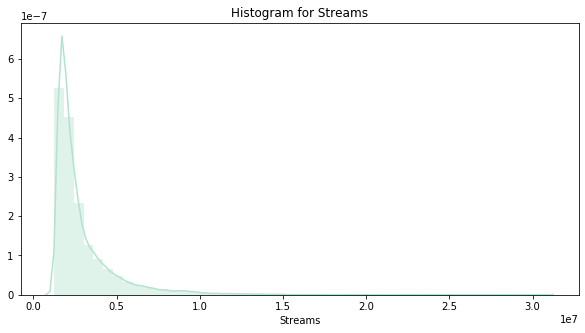

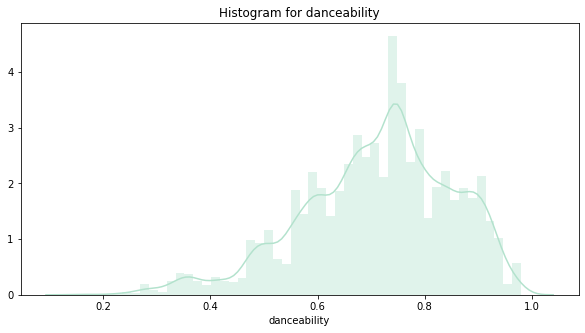

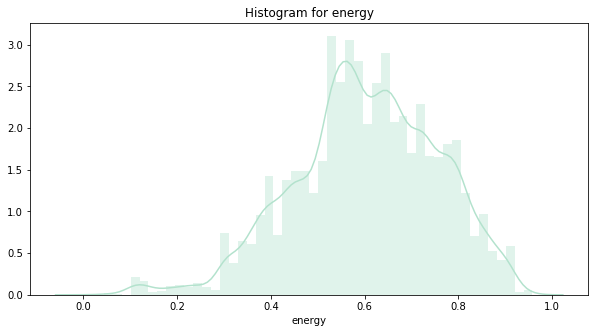

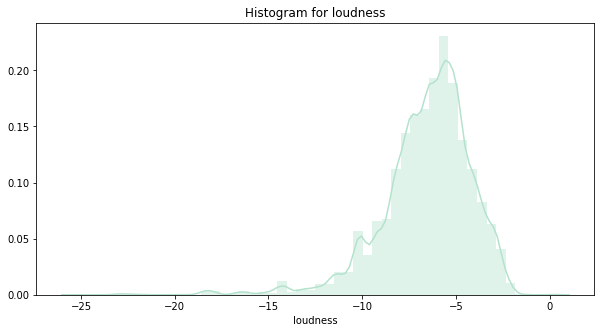

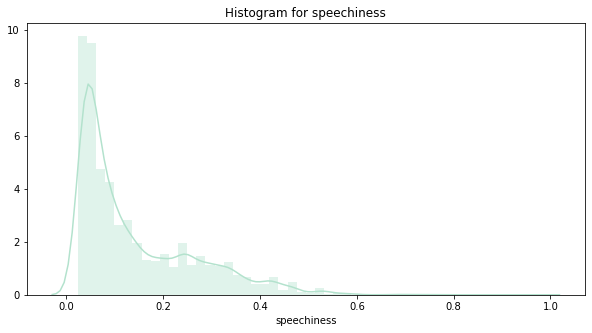

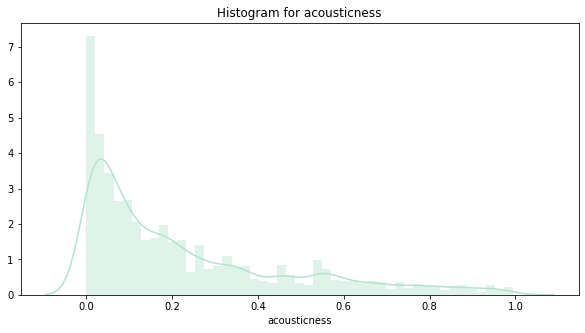

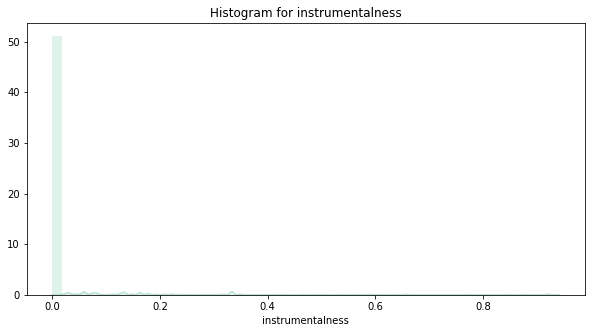

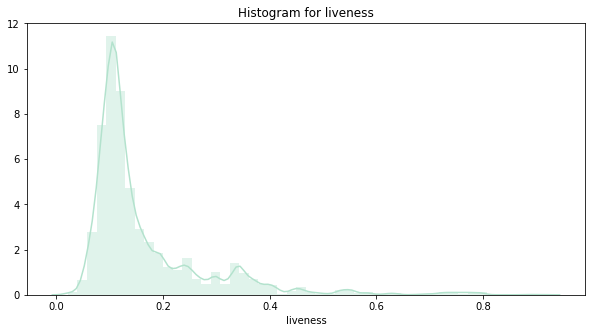

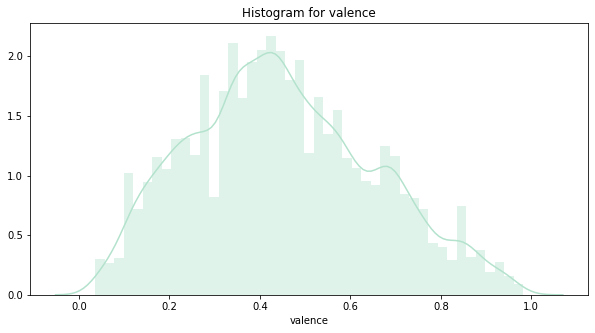

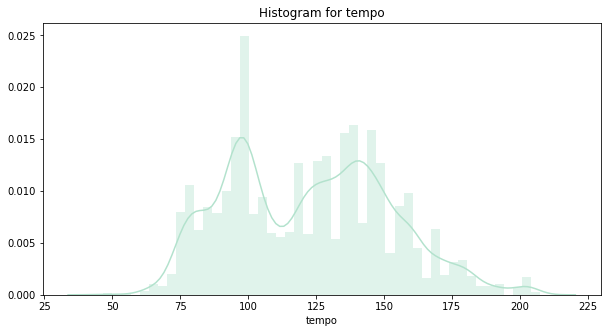

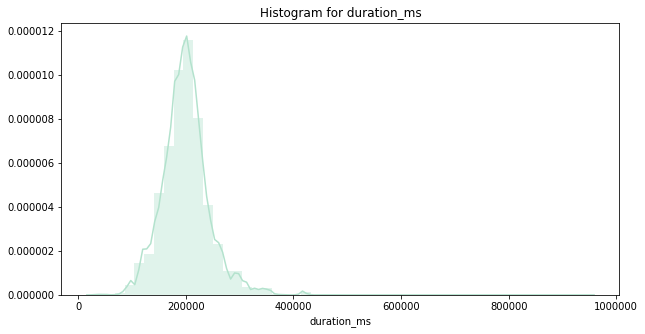

In [6]:
def histogram(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(feature))
    ax = sns.distplot(dfall[feature],color=sns.color_palette("Pastel2")[0])
histogram('Streams')
histogram('danceability')
histogram('energy')
histogram('loudness')
histogram('speechiness')
histogram('acousticness')
histogram('instrumentalness')
histogram('liveness')
histogram('valence')
histogram('tempo')
histogram('duration_ms')

[]

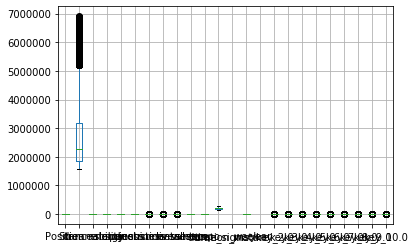

In [17]:
dfall.boxplot(return_type="dict")
plt.plot()

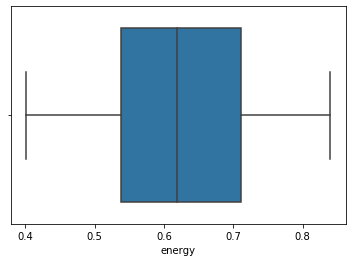

In [26]:
sns.boxplot(dfall["energy"])


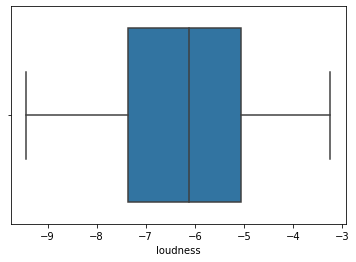

In [27]:
sns.boxplot(dfall["loudness"])

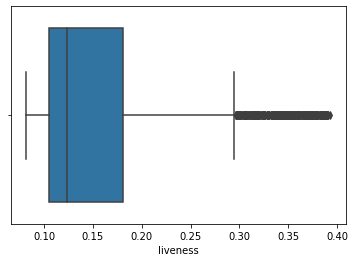

In [29]:
   sns.boxplot(dfall["liveness"]) 
    

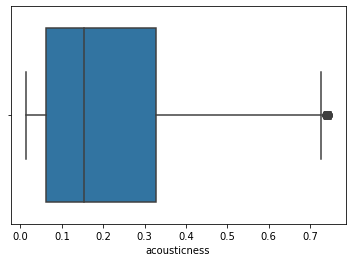

In [31]:
      sns.boxplot(dfall["acousticness"])     
    

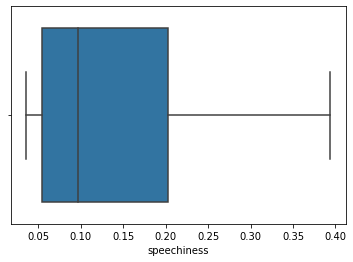

In [32]:
 sns.boxplot(dfall["speechiness"])    



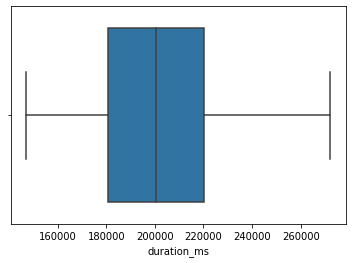

In [33]:
   sns.boxplot(dfall["duration_ms"])
  

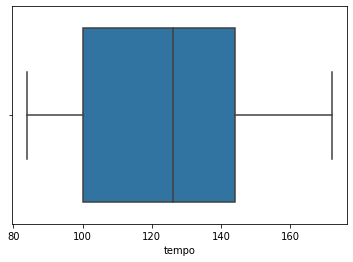

In [36]:
 sns.boxplot(dfall["tempo"])  

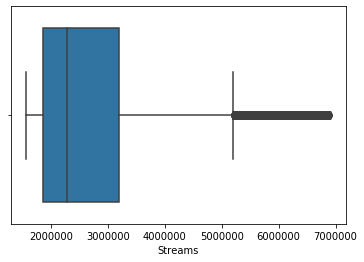

In [37]:
sns.boxplot(dfall["Streams"]) 

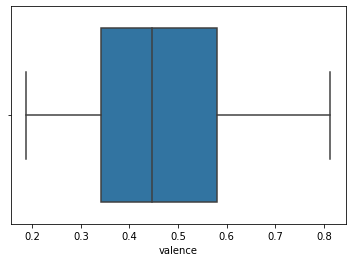

In [30]:
   sns.boxplot(dfall["valence"])    

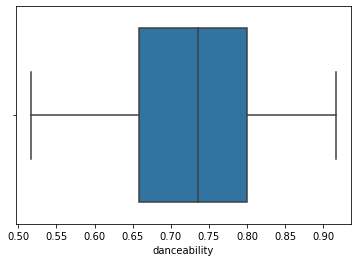

In [28]:
sns.boxplot(dfall["danceability"])

# OUTLIERS 

https://www.youtube.com/watch?v=rzR_cKnkD18

In [21]:
outliers=[] 
def detect_outliers(dfall):

    threshold=3
    mean=np.mean(dfall)
    std=np.std(dfall)
    
    for i in dfall:
    z_score= (i - mean)/std
    if np.abs(z_score) > threshold:
        outliers.append(y)
        return outliers

SyntaxError: invalid syntax (<ipython-input-21-9e00981d4611>, line 1)

In [ ]:
outlier_pt=detect_outliers(dfall)

In [ ]:
mid= np.median(outlier_pt)

In [7]:
lower_bound=0.1
upper_bound=0.95
res=dfall.quantile([lower_bound, upper_bound])
res


,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,week,year
0.10,20.90,1556392.0,0.516,0.400,1.0,-9.441,0.0,0.0351,0.013,0.000000,0.0813,0.186,83.90300,146520.0,4.0,11.0,2018.0
0.95,190.05,6908216.5,0.917,0.841,11.0,-3.240,1.0,0.3950,0.751,0.008542,0.3950,0.814,171.94665,272307.0,4.0,99.0,2019.0


In [8]:
true_index=(res.loc[lower_bound]<dfall) & (dfall<res.loc[upper_bound])
true_index

,Artist,Position,Streams,Track Name,URL,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,week,year
0,False,False,False,False,False,True,False,True,True,True,False,True,True,True,True,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,True,True,False,False,False,True,False,True,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,False,True,True,False,False,False,False,True,False,False
20796,False,False,False,False,False,True,False,True,True,True,False,True,False,True,True,False,True,True,False,False,False,False,True,False,False
20797,False,False,False,False,False,True,False,False,True,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False
20798,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False


In [9]:
false_index=-true_index
false_index

,Artist,Position,Streams,Track Name,URL,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,week,year
0,True,True,True,True,True,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,True,True
1,True,True,True,True,True,False,True,False,False,True,True,True,False,True,False,True,False,False,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,False,False,False,True,True,True,False,False,True,False,True,True,True,True,True,False,True,True
3,True,True,True,True,True,True,True,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,True,True
4,True,True,True,True,True,False,True,False,False,False,True,True,False,False,False,True,False,False,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,True,True,True,True,True,False,True,False,False,False,True,True,False,False,False,True,False,False,True,True,True,True,False,True,True
20796,True,True,True,True,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,True,True,True,False,True,True
20797,True,True,True,True,True,False,True,True,False,False,True,True,False,False,True,True,False,False,True,True,True,True,True,True,True
20798,True,True,True,True,True,True,True,False,False,True,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True


In [10]:
mid= np.median(dfall[true_index])
mid

nan

In [11]:
dfall[false_index]=mid

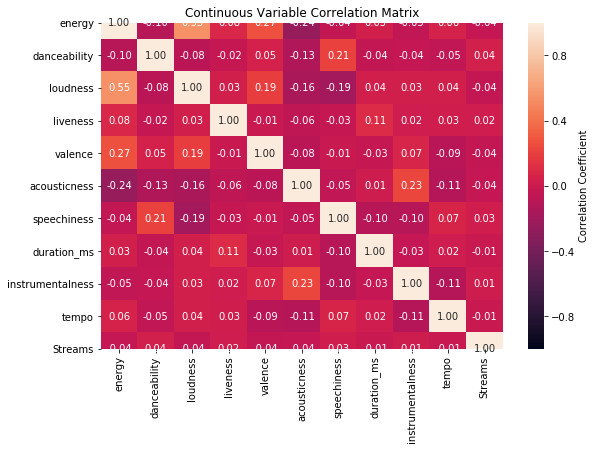

In [12]:
continuous_cols = [
    'energy',
    'danceability',
    'loudness',
    'liveness',
    'valence',
    'acousticness',
    'speechiness',
    'duration_ms',
    'instrumentalness',
    'tempo',
    'Streams'
    
]
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(dfall[continuous_cols].corr(), 
                 annot=True, fmt=".2f",
                 vmin=-1, vmax=1,
                 cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Continuous Variable Correlation Matrix")
plt.show()

In [13]:
for column in dfall.columns:
        if dfall[column].dtype=="O":
            print(column,dfall[column].unique())

Track Name [nan]
Artist [nan]
URL [nan]
type [nan]
id [nan]
uri [nan]
track_href [nan]
analysis_url [nan]


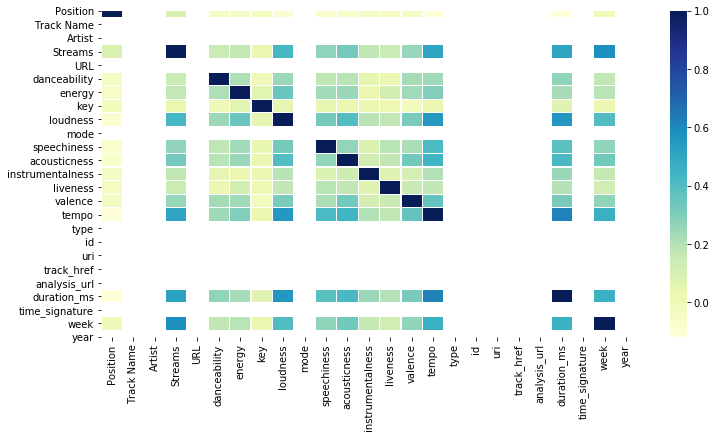

In [14]:
plt.figure(figsize=(12, 6))
corr = dfall.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [15]:
dummies=pd.get_dummies(dfall["URL"],prefix="URL")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="URL")

dummies=pd.get_dummies(dfall["Artist"],prefix="Artist")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="Artist")


dummies=pd.get_dummies(dfall["key"],prefix="key")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="key")

dummies=pd.get_dummies(dfall["mode"],prefix="mode")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="mode")


dummies=pd.get_dummies(dfall["type"],prefix="type")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="type")

dummies=pd.get_dummies(dfall["id"],prefix="id")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="id")

dummies=pd.get_dummies(dfall["uri"],prefix="uri")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="uri")

dummies=pd.get_dummies(dfall["track_href"],prefix="track_href")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="track_href")

dummies=pd.get_dummies(dfall["analysis_url"],prefix="analysis_url")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="analysis_url")

dummies=pd.get_dummies(dfall["Track Name"],prefix="Track Name")
dfall = pd.concat([dfall, dummies], axis=1)
dfall=dfall.drop(columns="Track Name")


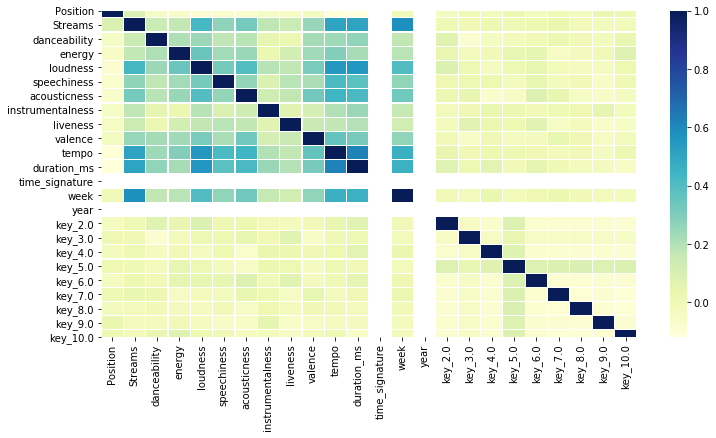

In [16]:
plt.figure(figsize=(12, 6))
corr = dfall.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")